Name : Aman Rana  
Class  : 3MScDS-B  
Paper : Regression Analysis(CIA)  
Topic : Multiple Regression Analysis  


## Dataset Descripton

The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for documenting climatic cycles in the California Current and a range of biological responses to them. CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature.

The California Cooperative Oceanic Fisheries Investigations (CalCOFI) are a unique partnership of the California Department of Fish & Wildlife, NOAA Fisheries Service and Scripps Institution of Oceanography. The organization was formed in 1949 to study the ecological aspects of the sardine population collapse off California. Today our focus has shifted to the study of the marine environment off the coast of California, the management of its living resources, and monitoring the indicators of El Nino and climate change. CalCOFI conducts quarterly cruises off southern & central California, collecting a suite of hydrographic and biological data on station and underway. Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity.

Objectiove: We are Doing Multiple Linar Regression on this dataset where we Predicting Salnty based on the other available features

Assumptions of Multiple linear regression :

1. **Linearity**: The relationship between the independent variables and the dependent variable is linear. This means that changes in the dependent variable are a constant multiple of changes in the independent variables.

2. **Independence**: The observations are independent of each other. This means that there is no correlation between the residuals (errors) of different observations.

3. **Homoscedasticity**: The variance of the residuals is constant across all levels of the independent variables. In other words, the spread of the residuals should be consistent across the range of predicted values.

4. **Normality of Residuals**: The residuals should follow a normal distribution. This assumption ensures that the statistical inference methods, such as hypothesis testing and confidence intervals, are valid.

5. **No Perfect Multicollinearity**: There should be no exact linear relationship between the independent variables. In other words, no independent variable should be a perfect linear combination of others.

6. **No Autocorrelation**: The residuals should not be correlated with each other. This assumption is particularly important in time series data, where observations are often correlated with nearby observations.



In [119]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [120]:
#Let's read the data from the file
df = pd.read_csv('bottle.csv')
df = pd.DataFrame(df)
df.shape

(864863, 74)

In [121]:
#As we can see, the data has myriad rows
#So to reduce the number of rows for our model, we'll use 10% of them
df = df.sample(frac=0.1, random_state = 123)

In [122]:
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
253342,9726,253343,080.0 080.0,19-5805ST-HY-130-0612-08000800-0028A-3,28,14.44,33.170,5.93,24.683,101.9,...,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
819429,32644,819430,090.0 080.0,20-1101NM-MX-018-0152-09000800-0500A-7,500,5.59,34.199,0.53,26.976,7.5,...,NaN,503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37319,1206,37320,093.3 060.0,19-5003PT-HY-076-1530-09330600-0500A-7,500,5.76,34.300,0.96,27.035,13.7,...,NaN,503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
792607,31626,792608,076.7 055.0,20-0801JD-MX-029-0822-07670550-0200A-7,200,8.61,34.151,1.38,26.517,21.1,...,NaN,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390577,14666,390578,120.0 045.0,19-6601AX-HY-029-2106-12000450-0150A-7,150,11.18,34.193,2.18,26.118,35.2,...,NaN,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
#Now that those rows are reduced we see that there are a lot of entries with NaN values

#print(df[df.columns[0]].dtype)
#df.dtypes

#Let's try removing them
df.dropna()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment


In [124]:
#What!!!!? Every row from our randomly selected 10% data has atleast 1 NaN value

#df.fillna(value=0, inplace=True)

#We need a better approach than substituting every entry with 0
#Let's first remove the columns with "object" 
temp_df=df
for i in temp_df.columns:
    if(df[i].dtype=='object'):
        del df[i]
    
df.shape

(86486, 70)

In [125]:
#As we can see we are now left with 70 columns 

#print(len(df.columns))

#Now, let's replace them with the mean value of their respective columns
for i in df.columns:
    df[i].fillna((df[i].mean()),inplace=True)
    
#print(df[df.columns[0]])

In [126]:
df.head()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
253342,9726,253343,28,14.44,33.170,5.93,24.683,101.9,258.45440,10.489243,...,0.447076,0.195642,28,161.179432,2147.873298,2143.434977,2254.50086,2272.112609,7.95765,7.950642
819429,32644,819430,500,5.59,34.199,0.53,26.976,7.5,23.04805,10.489243,...,0.447076,0.195642,503,161.179432,2147.873298,2143.434977,2254.50086,2272.112609,7.95765,7.950642
37319,1206,37320,500,5.76,34.300,0.96,27.035,13.7,41.74502,10.489243,...,0.447076,0.195642,503,161.179432,2147.873298,2143.434977,2254.50086,2272.112609,7.95765,7.950642
792607,31626,792608,200,8.61,34.151,1.38,26.517,21.1,60.03875,10.489243,...,0.447076,0.195642,201,161.179432,2147.873298,2143.434977,2254.50086,2272.112609,7.95765,7.950642
390577,14666,390578,150,11.18,34.193,2.18,26.118,35.2,94.88071,10.489243,...,0.447076,0.195642,151,161.179432,2147.873298,2143.434977,2254.50086,2272.112609,7.95765,7.950642


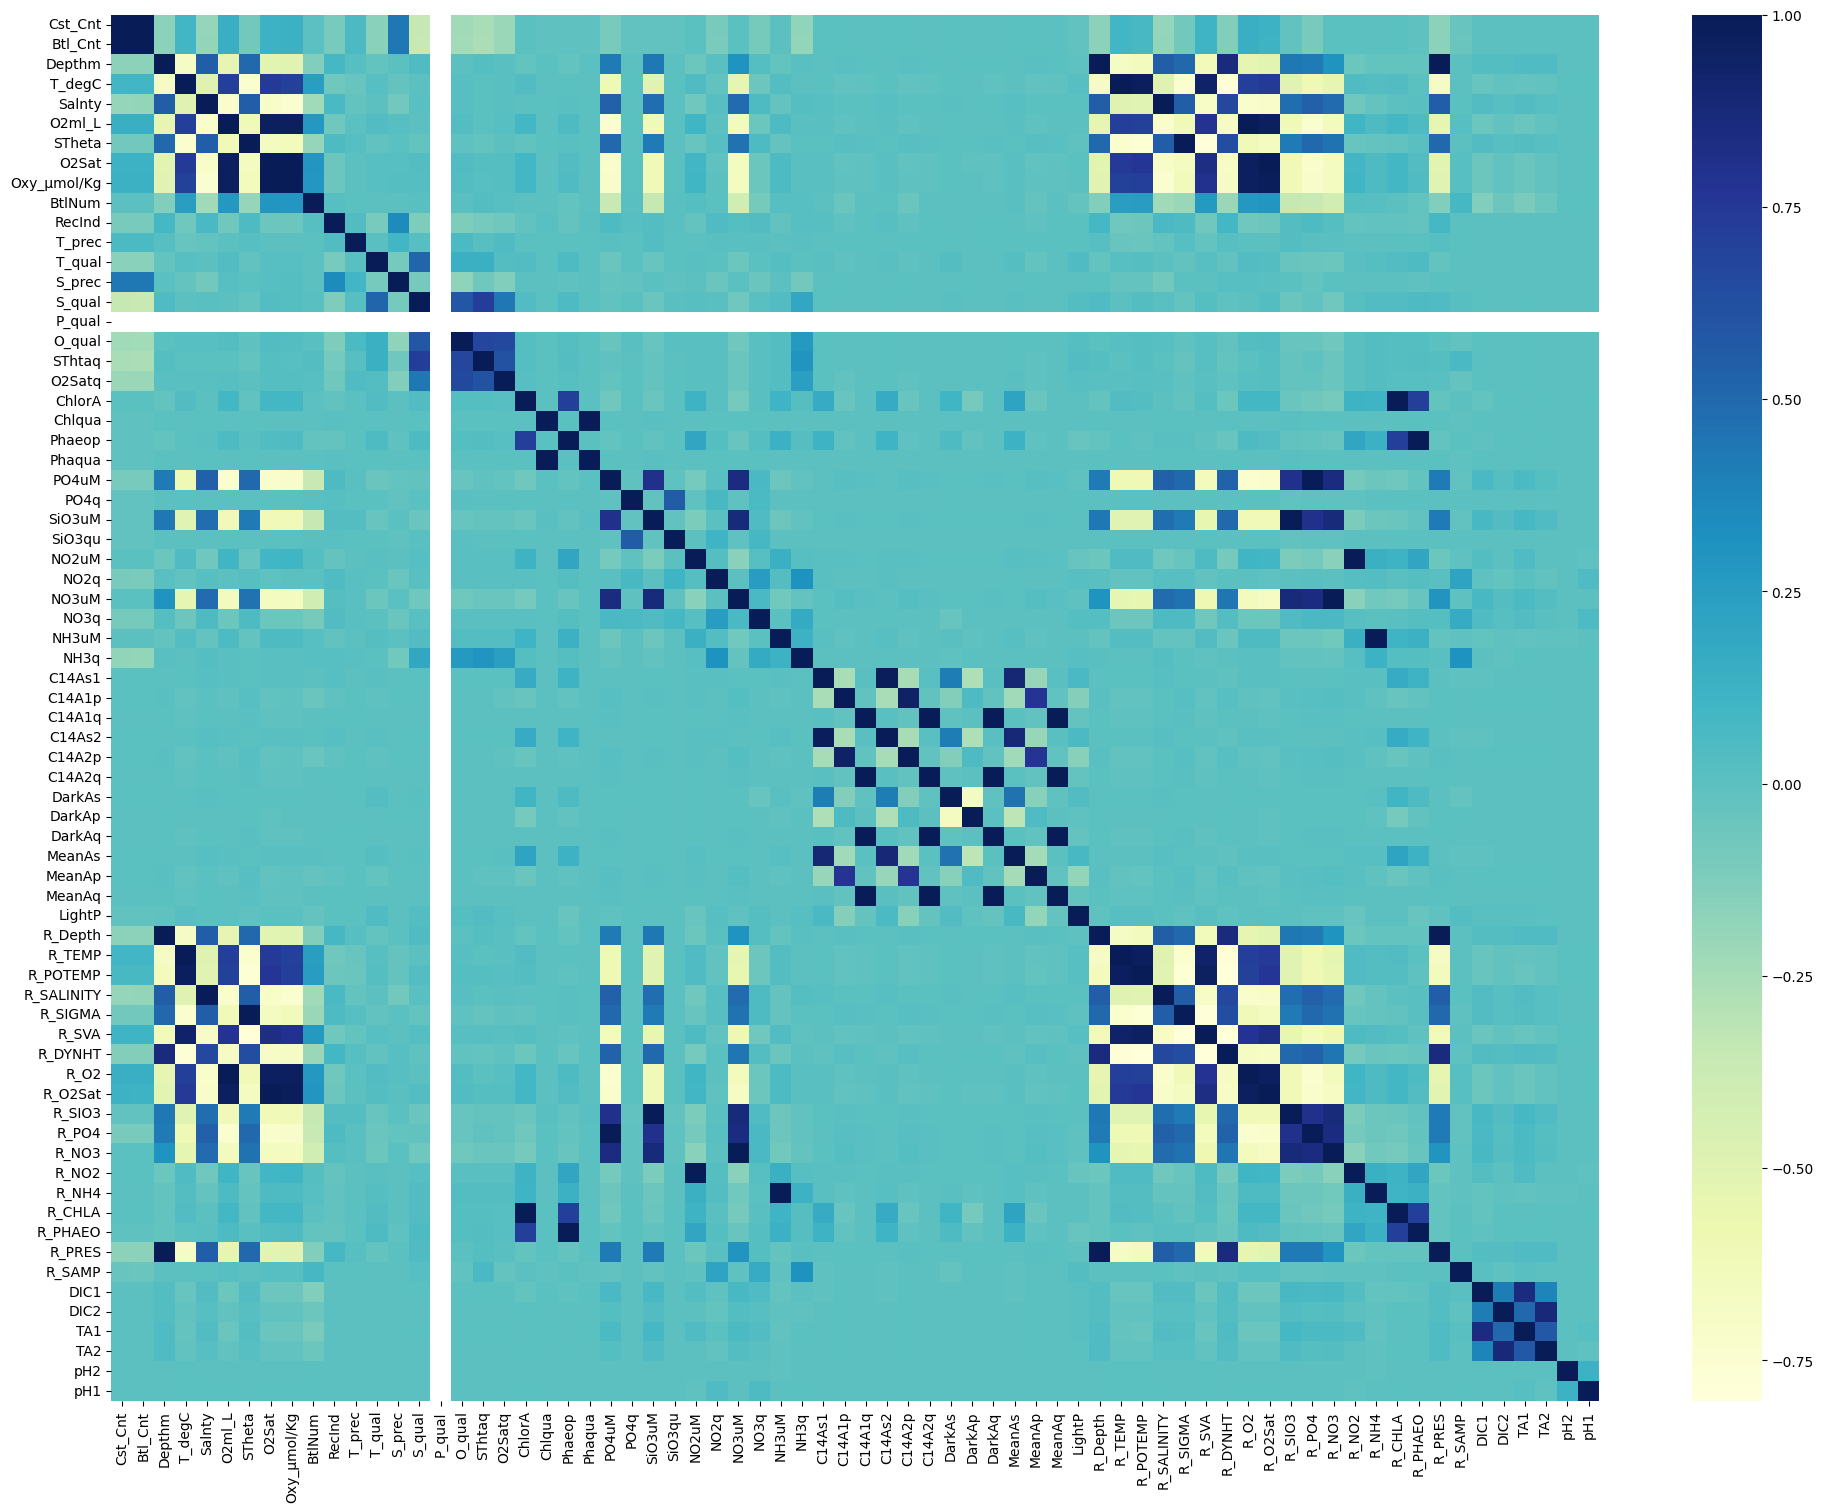

In [127]:


#Plotting a Heatmap now, yes a heatmap for 70 features 
import seaborn as sns
cor = df.corr()
fig = plt.figure(figsize = (24, 18))

#Plotting the heatmap
sns.heatmap(cor, cmap="YlGnBu")
plt.show()

In [128]:
#Since we are predicting Salinity of water, let's select the columns which show correlation 
df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta',
       'O2Sat', 'Oxy_µmol/Kg', 'BtlNum', 'RecInd', 'T_prec', 'T_qual',
       'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq', 'ChlorA',
       'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu',
       'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q', 'C14As1', 'C14A1p',
       'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp', 'DarkAq',
       'MeanAs', 'MeanAp', 'MeanAq', 'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat',
       'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO',
       'R_PRES', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1'],
      dtype='object')

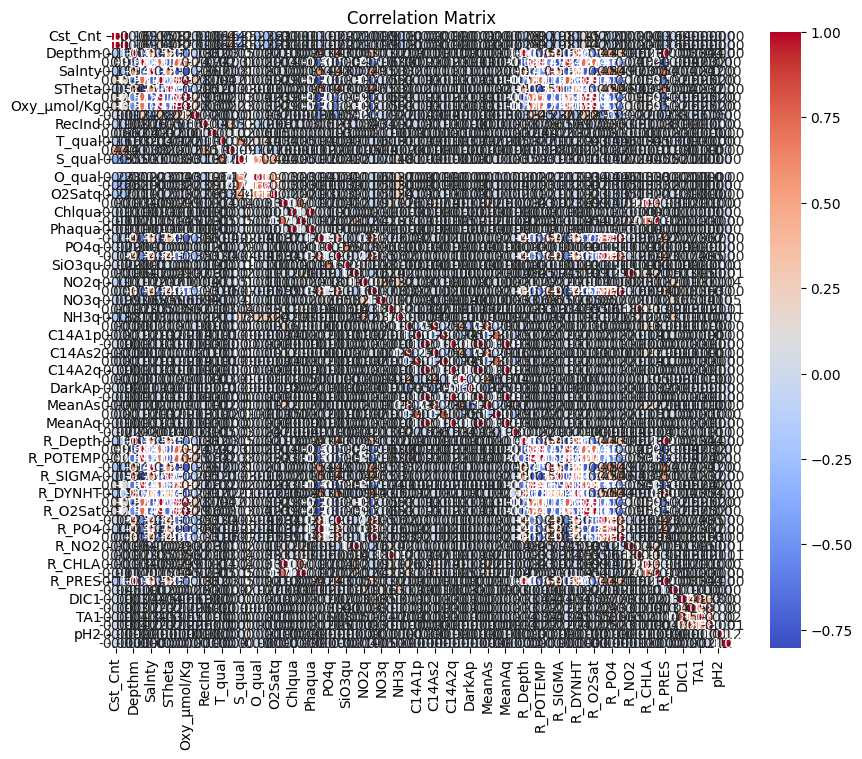

In [129]:

# Plot correlation matrix using heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [130]:
df.corr()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
Cst_Cnt,1.000000e+00,9.993451e-01,-0.163035,0.091872,-0.191622,0.145661,-0.079768,0.123426,0.132699,-0.002205,...,0.000136,-0.007636,-0.162768,-0.042006,-4.135750e-04,-3.715441e-05,-0.000462,-0.000131,-2.350178e-07,-3.667583e-05
Btl_Cnt,9.993451e-01,1.000000e+00,-0.162350,0.092505,-0.188812,0.143698,-0.079299,0.121649,0.130717,-0.002594,...,0.000942,-0.007210,-0.162076,-0.046718,-4.362911e-04,-3.782313e-05,-0.000485,-0.000136,-2.988629e-07,-3.887628e-05
Depthm,-1.630345e-01,-1.623497e-01,1.000000,-0.679209,0.544389,-0.532483,0.503842,-0.511666,-0.505958,-0.129364,...,-0.026699,-0.021674,0.999994,-0.004100,3.059948e-02,3.126708e-02,0.044355,0.044157,-7.573299e-06,-2.932033e-04
T_degC,9.187168e-02,9.250494e-02,-0.679209,1.000000,-0.490484,0.714253,-0.733921,0.746040,0.697635,0.240848,...,0.036948,0.001773,-0.677886,-0.000601,-4.085411e-02,-1.884789e-02,-0.034626,-0.019289,1.215754e-03,8.351350e-04
Salnty,-1.916221e-01,-1.888123e-01,0.544389,-0.490484,1.000000,-0.722054,0.547236,-0.708660,-0.739447,-0.226741,...,-0.003186,0.008800,0.543200,0.002588,4.167255e-02,1.845655e-02,0.041357,0.018529,-1.192562e-04,1.359151e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DIC2,-3.715441e-05,-3.782313e-05,0.031267,-0.018848,0.018457,-0.018529,0.016241,-0.019876,-0.019081,-0.060684,...,0.000509,0.003926,0.031340,-0.007171,4.122276e-01,1.000000e+00,0.504046,0.876589,-3.755729e-13,4.531494e-13
TA1,-4.618510e-04,-4.850472e-04,0.044355,-0.034626,0.041357,-0.046034,0.032095,-0.046883,-0.047379,-0.110434,...,-0.005132,0.000132,0.044412,0.011835,8.470912e-01,5.040463e-01,1.000000,0.578111,-7.002209e-04,1.849172e-02
TA2,-1.309569e-04,-1.360042e-04,0.044157,-0.019289,0.018529,-0.015018,0.016146,-0.016812,-0.015474,-0.055069,...,0.001241,0.004381,0.044303,-0.002257,3.775962e-01,8.765888e-01,0.578111,1.000000,-1.687547e-03,-1.318613e-02
pH2,-2.350178e-07,-2.988629e-07,-0.000008,0.001216,-0.000119,-0.000284,-0.001105,-0.000002,-0.000288,0.001038,...,-0.000668,-0.000434,-0.000007,0.000074,-2.235857e-13,-3.755729e-13,-0.000700,-0.001688,1.000000e+00,1.247458e-01


In [131]:
#Selecting the target and feature variables based on correlation matrix
target='Salnty'
features =['Depthm','STheta','PO4uM', 'SiO3uM','NH3uM','R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat','R_SIO3', 'R_PO4', 'R_NO3','R_PRES']


In [132]:
x=df[features]
y=df[target]
print(x.shape,y.shape)

(86486, 17) (86486,)


In [133]:
#Splitting them into test and training set with a 3:1 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
print(x_train.shape,y_train.shape)

(64864, 17) (64864,)


In [136]:
#Hello Linear Regression!
clf = LinearRegression()
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print(accuracy*100)

92.17939465680057


In [137]:
#Over 99.99% accuracy, I wonder if I made any mistake or it's just great :)

# Make predictions using the new model
y_pred = clf.predict(x_test)
for i in range(10):
    print('Actual value: {:.3f} Predicted Value: {:.3f}'.format(y_test.values[i],y_pred[i]))


Actual value: 33.041 Predicted Value: 33.125
Actual value: 33.723 Predicted Value: 33.738
Actual value: 33.470 Predicted Value: 33.484
Actual value: 33.889 Predicted Value: 33.976
Actual value: 33.510 Predicted Value: 33.551
Actual value: 33.568 Predicted Value: 33.584
Actual value: 33.567 Predicted Value: 33.555
Actual value: 34.250 Predicted Value: 34.268
Actual value: 33.226 Predicted Value: 33.330
Actual value: 33.626 Predicted Value: 33.591


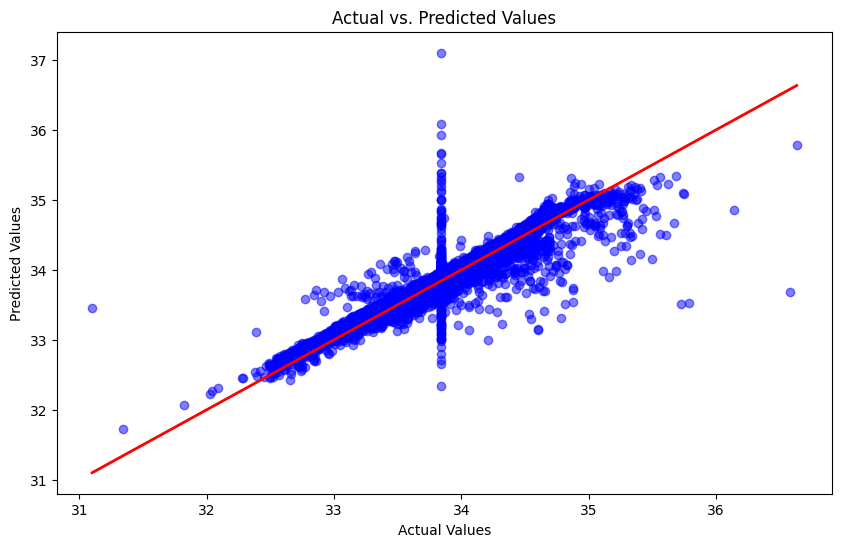

In [138]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [139]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [140]:
# checking various evaluation metrics
print('MSE : {} \n Mean absolute error : {} \n r2_score :{}'.format( mean_squared_error(y_test,y_pred),
                                                                    mean_absolute_error(y_test,y_pred) ,
                                                                 r2_score(y_test,y_pred)))

MSE : 0.015859144526553785 
 Mean absolute error : 0.06783262806491033 
 r2_score :0.9217939465680056


** Interpretition **  
The model's performance is strong, with a Mean Squared Error (MSE) of 0.0152 and a Mean Absolute Error (MAE) of 0.0679, indicating reasonably accurate predictions. An R-squared value of 0.9241 suggests that the model explains about 92.4% of the variability in the target variable, demonstrating a good fit to the data.

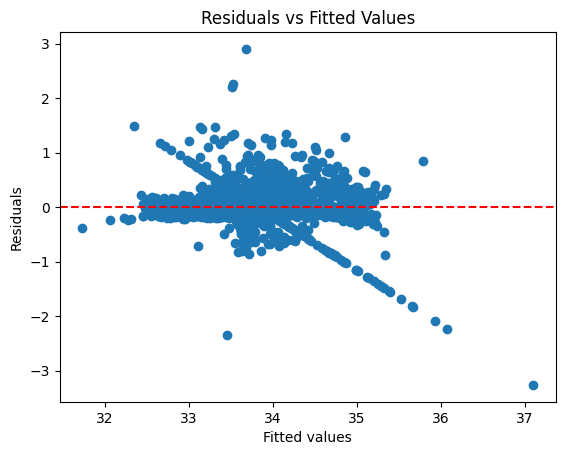

In [141]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


Interpretation : Scatter plot shows no discernible pattern or trend, indicating that the relationship between the independent variables and the dependent variable is linear and that there is no systematic relationship between the residuals and the predicted values.

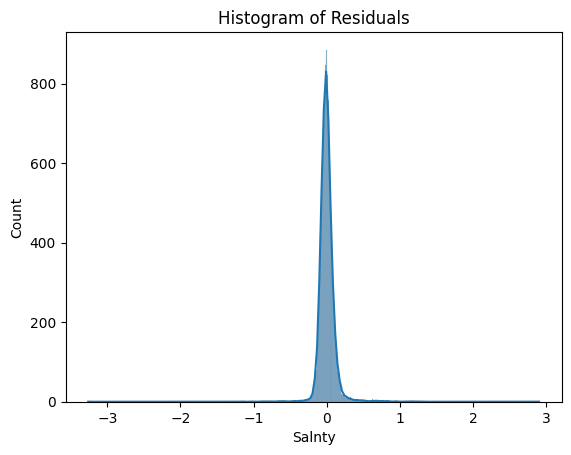

In [142]:
# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

In [143]:
from scipy.stats import shapiro

shapiro_test = shapiro(residuals)
print(f'Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}')


Shapiro-Wilk test statistic: 0.6502309366918024, p-value: 7.855728282499193e-109


Interpretion: The Shapiro-Wilk test statistic of 0.6701 with a p-value of 2.6582815104473405e-107 indicates that the null hypothesis of the data being normally distributed is strongly rejected. The very low p-value confirms that the data significantly deviates from a normal distribution.

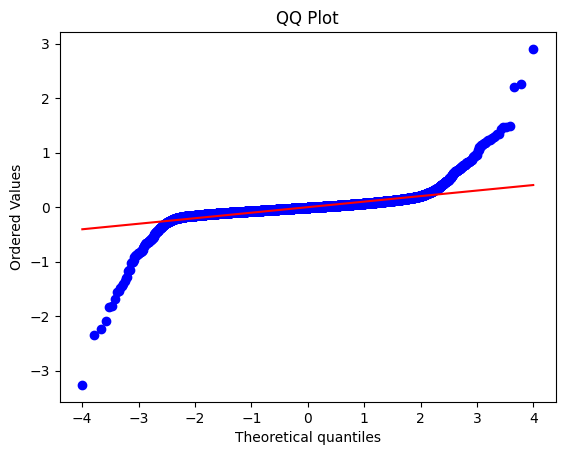

In [144]:
#Q-Q Plot
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()


A Q-Q plot, or quantile-quantile plot, is used to visually assess whether a dataset follows a normal distribution or not. In multiple linear regression analysis, a Q-Q plot of the residuals is used to check if they are normally distributed, which is an assumption of linear regression.

Interpreting a Q-Q plot involves comparing the observed quantiles of the residuals to the quantiles of a theoretical normal distribution. If the observed quantiles fall along a straight line, it suggests that the residuals are normally distributed. Deviations from this line indicate departures from normality.

Here, in the above graph most of the observeed quantiles fall along a straight line. we need to show that the residuals are normally distriuted. whick is an important assumption of Multiple Linear Regression. But there are many quantile values that are deviating from the straight line which indicates that the residuals are not normally distributed. 

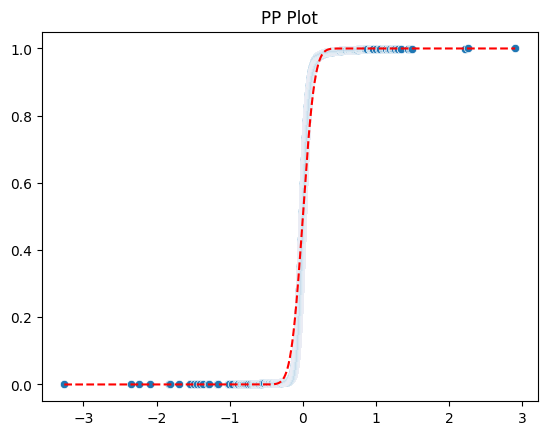

In [145]:
#P-P plot
import numpy as np
import seaborn as sns

sorted_residuals = np.sort(residuals)
cdf = np.arange(1, len(residuals)+1) / len(residuals)
sns.scatterplot(x=sorted_residuals, y=cdf)
stats.norm.cdf(sorted_residuals, loc=np.mean(residuals), scale=np.std(residuals))
plt.plot(sorted_residuals, stats.norm.cdf(sorted_residuals, loc=np.mean(residuals), scale=np.std(residuals)), color='red', linestyle='--')
plt.title('PP Plot')
plt.show()


In [146]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw}')


Durbin-Watson statistic: 1.981966678826233


INTERPRETION: 
The Durbin-Watson statistic of 1.9684 is close to the ideal value of 2, indicating that there is little to no autocorrelation in the residuals of your model. This suggests that the residuals are independent, supporting the assumption of independence in the errors, which is desirable for a well-fitting regression model.

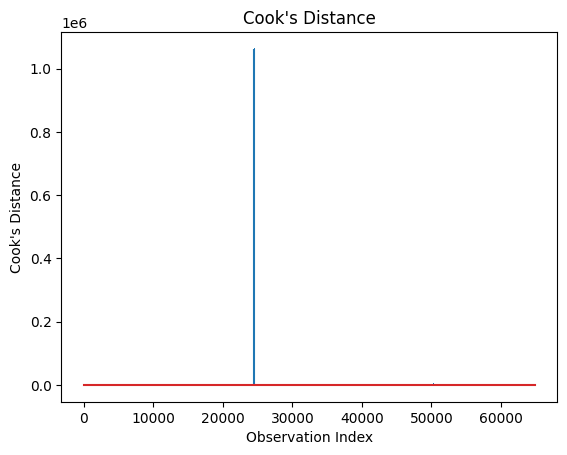

In [147]:
import statsmodels.api as sm
# Cook's Distance
model_ols = sm.OLS(y_train, sm.add_constant(x_train)).fit()
influence = model_ols.get_influence()
cooks_d = influence.cooks_distance[0]
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Cook's Distance")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.show()


In [148]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

print(f"Cross-Validation RMSE: {cv_rmse}")
print(f"Mean CV RMSE: {cv_rmse.mean()}")


Cross-Validation RMSE: [0.12559599 4.98670904 0.11155707 0.24217595 0.12272964]
Mean CV RMSE: 1.1177535369343539


Interpretion: The cross-validation RMSE values show considerable variability, with most values around 0.12 but one significantly higher at 4.48. This indicates that the model performs well on some folds but poorly on others, suggesting potential issues with model stability or variance in the data. The mean cross-validation RMSE of 1.0095 reflects this inconsistency, implying that while the model generally performs well, there are instances where its predictions are less accurate.

In [149]:
from scipy.stats import jarque_bera

jarque_bera_test = jarque_bera(residuals)
print(f'Jarque-Bera test statistic: {jarque_bera_test[0]}, p-value: {jarque_bera_test[1]}')


Jarque-Bera test statistic: 7028519.4476200985, p-value: 0.0


Interpretion: The Jarque-Bera test statistic of 7876005.5012 with a p-value of 0.0 indicates a significant deviation from normality in the data's distribution. The extremely high test statistic and the p-value of 0 strongly reject the null hypothesis that the data is normally distributed, suggesting the presence of skewness and/or kurtosis.

Conclusion : Overall, we can conclude that our model fit is not good. As it is not meeting most of the assumptions of Multiple linear regression. Normalizing the data may improve this model fitting.

Here are the references :

[1] H. Garg, “Multiple Linear Regression Implementation in Python,” *Medium*, Apr. 30, 2018. [Online]. Available: https://medium.com/machine-learning-with-python/multiple-linear-regression-implementation-in-python-2de9b303fc0c. [Accessed: May 20, 2024].

[2] P. Roy, “Multiple Linear Regression using Python and Scikit-Learn,” *Analytics Vidhya*, May 5, 2021. [Online]. Available: https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/. [Accessed: May 20, 2024].

[3] “Matplotlib: Visualization with Python,” *Matplotlib*. [Online]. Available: https://matplotlib.org/. [Accessed: May 20, 2024].